Bank kartasi, oyligi, yoshi, jinsi va hokazolar asosida mijozning foyda topish kategoriyasini aniqlash bo'yicha neyronka. Boshlang'ich fayl Ne.xlsx da hammasi tushunarli berilgan. Ular "многоклассовая классификация" ноутбукида керакли жойлари сонли куринишга келтирилган ва  klassific_data.xlsx сакланган. Уша файлни ишлатамиз.

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

In [55]:
# Установка семени для воспроизводимости
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42) # Установка семени для TensorFlow
tf.keras.utils.set_random_seed(42)  # Установка семени для Keras

In [56]:
df=pd.read_excel('klassific_data.xlsx')
df.head()

,Unnamed: 0,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag-end,Education_Level-end,Marital_Status-end,Income_Category-end,Card_Category-end,Gender-end
0,0,51,3,36,6,3,2,11512.0,988,10524.0,...,1842,32,1.133,0.086,1,2,1,1,0,1
1,1,38,1,20,5,1,3,5153.0,2517,2636.0,...,3095,63,0.969,0.488,1,2,1,1,0,0
2,2,41,4,36,3,1,1,6507.0,1452,5055.0,...,4544,89,0.854,0.223,1,2,2,1,0,1
3,3,26,0,18,4,3,2,2033.0,1471,562.0,...,2236,55,0.410,0.724,1,5,2,1,0,0
4,4,58,0,47,2,2,1,2194.0,1302,892.0,...,4962,81,0.841,0.593,1,2,1,1,0,0


In [57]:
df['Income_Category-end'].value_counts()

Income_Category-end
4    1112
1    1100
3    1088
2    1006
Name: count, dtype: int64

In [58]:
 X=df[['Customer_Age', 
    'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio', 'Attrition_Flag-end', 
    'Education_Level-end', 'Marital_Status-end', 
    'Card_Category-end', 'Gender-end']].values
y=df['Income_Category-end'].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # В этой строке происходит одновременно и вычисление 
                                        # параметров (метод fit), и преобразование данных (метод transform). Результат сохраняется в X_train
X_test = scaler.transform(X_test)

In [61]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Input
import seaborn as sns
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input

from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier

from keras_tuner import HyperParameters
from keras_tuner import HyperModel

In [77]:
# Кодирование меток
from keras.utils import to_categorical 
# Преобразование целевой переменной в one-hot encoding
y_encoded = pd.get_dummies(y_train).values  # Применяем к y_train
print(y_encoded.shape)  # Должно быть (число_образцов, 4)

(3444, 4)


In [83]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Входной слой
model.add(Dense(64, activation='relu'))  # Скрытый слой
model.add(Dense(32, activation='relu'))  # Скрытый слой
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Выходной слой с 4 нейронами


In [85]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0)

In [91]:
# Обучение модели
history=model.fit(X_train, y_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=0, callbacks=[es])


In [97]:
import matplotlib.pyplot as plt

# Оценка модели на тестовых данных
# Преобразуем y_test в one-hot encoding
y_test_encoded = pd.get_dummies(y_test).values

In [99]:
# Оценка модели
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.9356, Test Accuracy: 0.5162


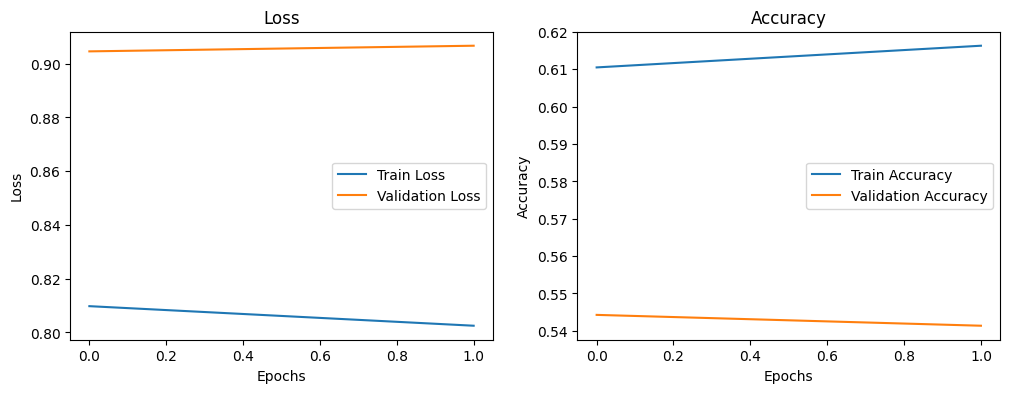

In [105]:
# Визуализация истории обучения
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # График потерь
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
        # График точности
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    # Визуализируем историю обучения
plot_history(history)

In [107]:
# Прогнозирование на тестовых данных
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [109]:
# Преобразование предсказанных классов обратно в оригинальные метки
predicted_labels = pd.Series(predicted_classes).map(lambda x: unique_classes[x])

In [111]:
# Сравнение предсказанных и истинных меток
results = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': predicted_labels})
print(results.head(10))  # Вывод первых 10 результатов

   True Labels  Predicted Labels
0            1                 4
1            4                 4
2            3                 2
3            3                 3
4            4                 2
5            1                 1
6            2                 3
7            1                 4
8            2                 3
9            1                 1
